In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets                                        #train_test_split used for to devide both train data and
import numpy as np                                                        #test data
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [58]:
iris = pd.read_csv('E:\\iris.csv')
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [113]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [60]:
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [61]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [62]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [63]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [64]:
iris['Species'].unique()

array([0, 1, 2])

In [65]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [66]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [67]:
colnames = list(iris.columns)
colnames

['Unnamed: 0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species']

In [68]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [69]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [70]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

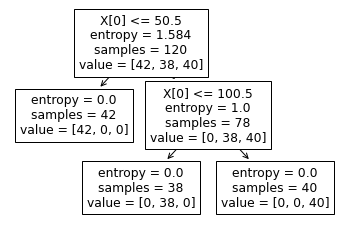

In [71]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [72]:
y_train.value_counts().keys()

Int64Index([0, 2, 1], dtype='int64')

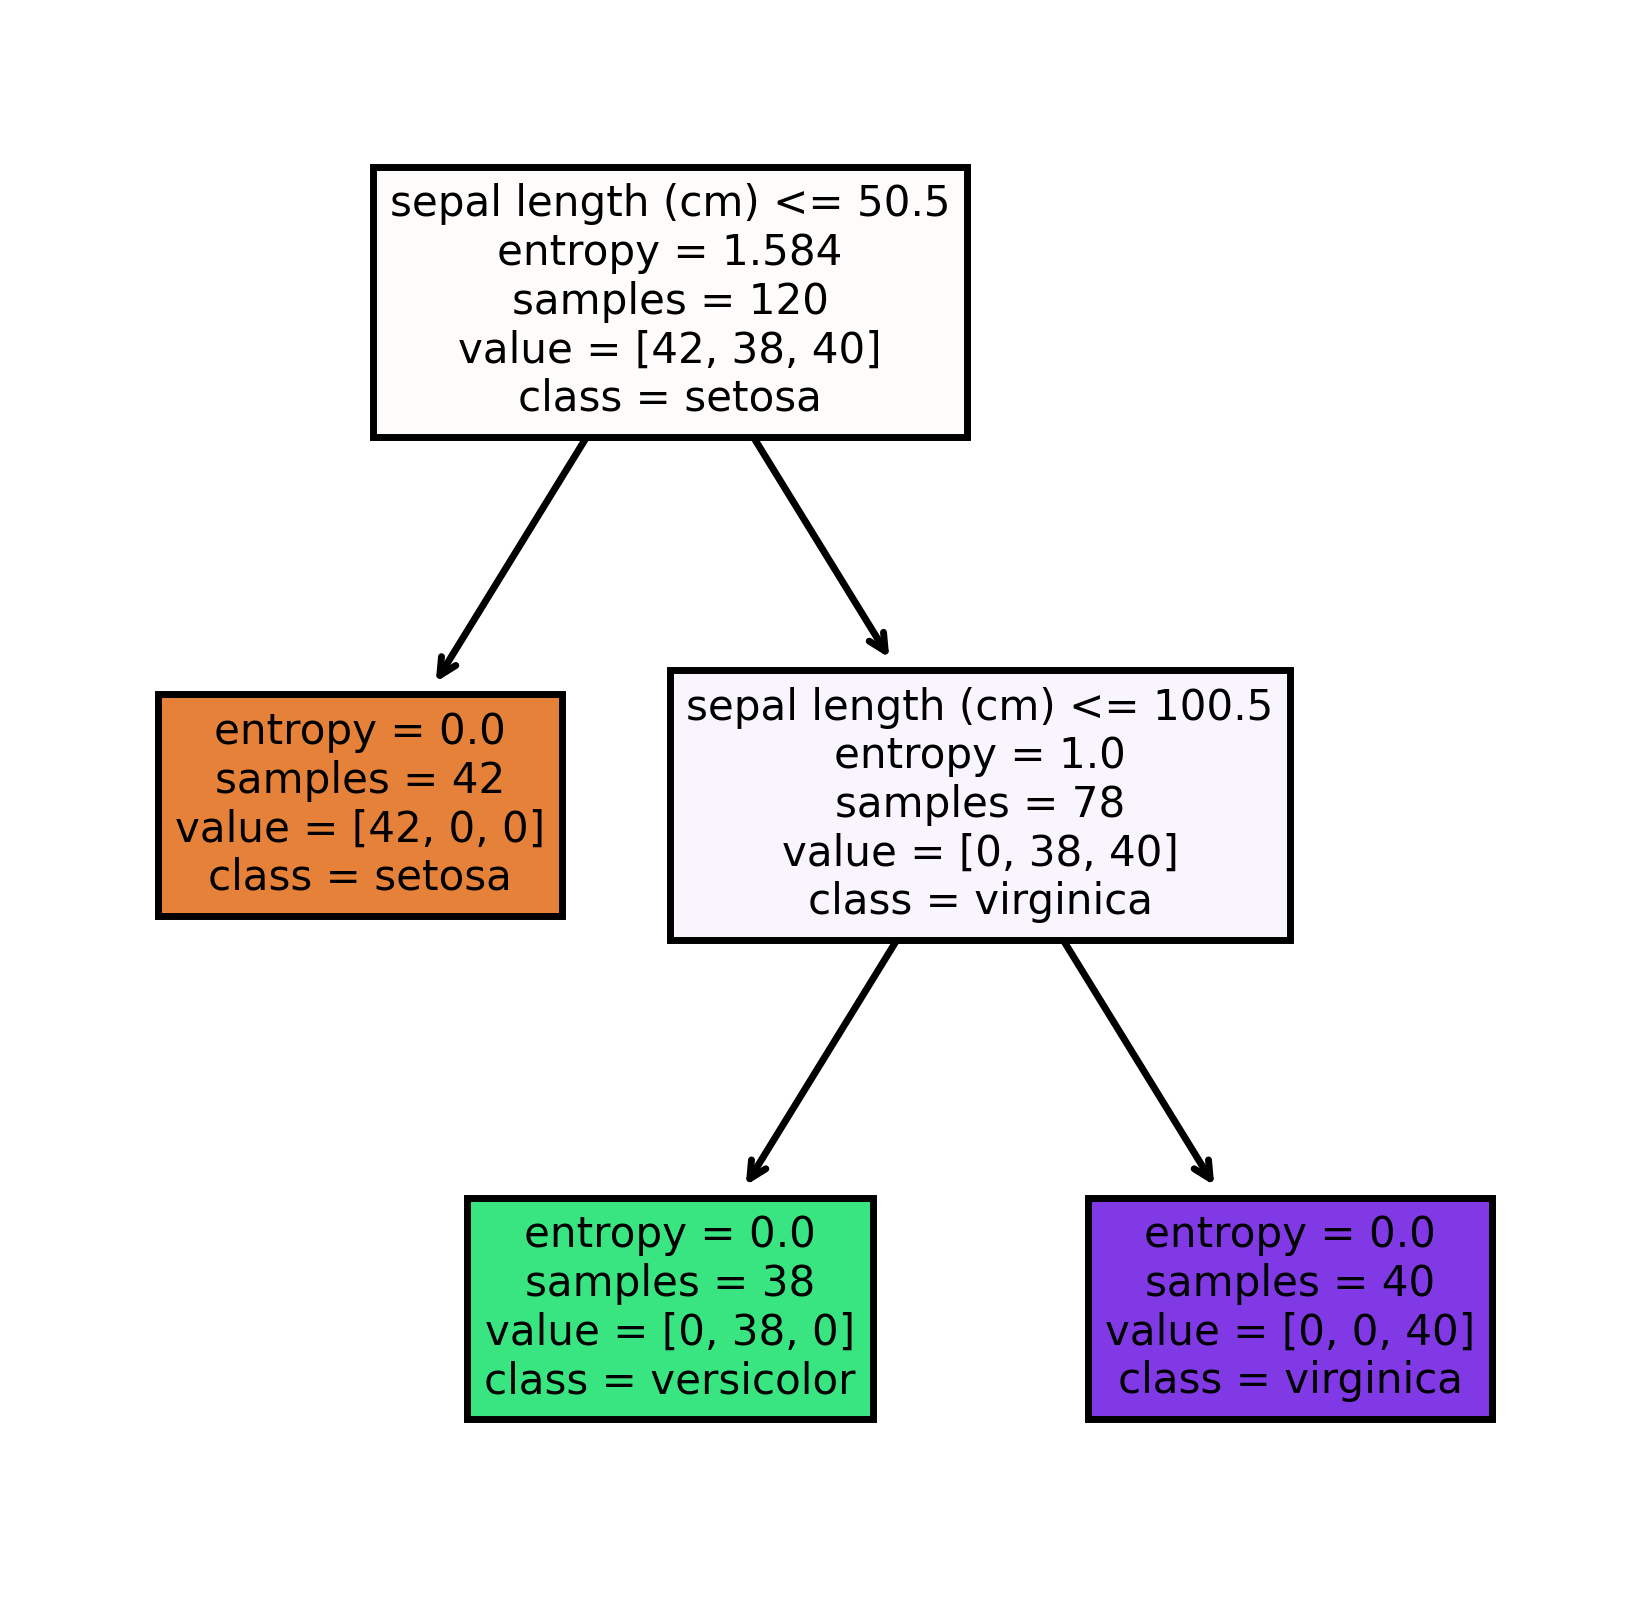

In [73]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] #.columns
cn=['setosa', 'versicolor', 'virginica']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [74]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [75]:
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [76]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [77]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [78]:
preds,y_test

(array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
        1, 0, 1, 0, 0, 2, 0, 1]),
 38     0
 66     1
 115    2
 117    2
 89     1
 136    2
 68     1
 94     1
 84     1
 28     0
 90     1
 11     0
 40     0
 126    2
 79     1
 144    2
 123    2
 124    2
 76     1
 59     1
 132    2
 105    2
 53     1
 17     0
 64     1
 18     0
 13     0
 116    2
 9      0
 81     1
 Name: Species, dtype: int32)

In [79]:
#Accuracy 
from sklearn.metrics import accuracy_score
np.mean(preds==y_test),accuracy_score(y_test,preds)

(1.0, 1.0)

In [80]:
#Building Decision Tree Classifier (CART) using Gini Criteria








In [81]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [82]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [83]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [84]:
#Decision Tree Regression Example









In [85]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [86]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [88]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [89]:
#Find the accuracy
model.score(X_test,y_test)

0.9562402321946863

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [92]:
#import the dataset
credit=pd.read_csv("E:\\credit.csv")
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [93]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [94]:
credit['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [95]:
#complete the credit dataset by label encoder
label_encoder=preprocessing.LabelEncoder()
credit['default']=label_encoder.fit_transform(credit['default'])
credit['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [96]:
credit['checking_balance'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [97]:
label_encoder=preprocessing.LabelEncoder()
credit['checking_balance']=label_encoder.fit_transform(credit['checking_balance'])
credit['checking_balance'].value_counts()

3    394
1    274
0    269
2     63
Name: checking_balance, dtype: int64

In [98]:
credit['savings_balance'].value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [99]:
label_encoder=preprocessing.LabelEncoder()
credit['savings_balance']=label_encoder.fit_transform(credit['savings_balance'])
credit['savings_balance'].value_counts()

2    603
4    183
0    103
1     63
3     48
Name: savings_balance, dtype: int64

In [100]:
credit['employment_duration'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [101]:
label_encoder=preprocessing.LabelEncoder()
credit['employment_duration']=label_encoder.fit_transform(credit['employment_duration'])
credit['employment_duration'].value_counts()

0    339
3    253
1    174
2    172
4     62
Name: employment_duration, dtype: int64

In [102]:
credit['credit_history'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [103]:
label_encoder=preprocessing.LabelEncoder()
credit['credit_history']=label_encoder.fit_transform(credit['credit_history'])
credit['credit_history'].value_counts()

1    530
0    293
3     88
4     49
2     40
Name: credit_history, dtype: int64

In [104]:
credit['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [105]:
label_encoder=preprocessing.LabelEncoder()
credit['purpose']=label_encoder.fit_transform(credit['purpose'])
credit['purpose'].value_counts()

4    473
1    337
0     97
3     59
5     22
2     12
Name: purpose, dtype: int64

In [125]:
credit['other_credit'].value_counts()

none     814
bank     139
store     47
Name: other_credit, dtype: int64

In [126]:
label_encoder=preprocessing.LabelEncoder()
credit['other_credit']=label_encoder.fit_transform(credit['other_credit'])
credit['other_credit'].value_counts()

1    814
0    139
2     47
Name: other_credit, dtype: int64

In [127]:
credit['housing'].value_counts()

own      713
rent     179
other    108
Name: housing, dtype: int64

In [129]:
label_encoder=preprocessing.LabelEncoder()
credit['housing']=label_encoder.fit_transform(credit['housing'])
credit['housing'].value_counts()

1    713
2    179
0    108
Name: housing, dtype: int64

In [130]:
credit['job'].value_counts()

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64

In [131]:
label_encoder=preprocessing.LabelEncoder()
credit['job']=label_encoder.fit_transform(credit['job'])
credit['job'].value_counts()

1    630
3    200
0    148
2     22
Name: job, dtype: int64

In [136]:
credit['phone'].value_counts()

0    596
1    404
Name: phone, dtype: int64

In [137]:
label_encoder=preprocessing.LabelEncoder()
credit['phone']=label_encoder.fit_transform(credit['phone'])
credit['phone'].value_counts()

0    596
1    404
Name: phone, dtype: int64

In [138]:
x=credit.iloc[:,0:16]
y=credit.iloc[:,16]

In [139]:
credit['default'].unique()

array([0, 1])

In [140]:
credit.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [141]:
colnames=list(credit.columns)
colnames

['checking_balance',
 'months_loan_duration',
 'credit_history',
 'purpose',
 'amount',
 'savings_balance',
 'employment_duration',
 'percent_of_income',
 'years_at_residence',
 'age',
 'other_credit',
 'housing',
 'existing_loans_count',
 'job',
 'dependents',
 'phone',
 'default']

In [142]:
#splitting the data into training and testing dataset
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=0)

In [158]:
#Building Decision Tree Classifier using Entropy Criteria

model=DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [159]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5267857142857143, 0.9, 'X[0] <= 1.5\nentropy = 0.883\nsamples = 750\nvalue = [524, 226]'),
 Text(0.2857142857142857, 0.7, 'X[1] <= 22.5\nentropy = 0.99\nsamples = 410\nvalue = [229, 181]'),
 Text(0.14285714285714285, 0.5, 'X[2] <= 3.5\nentropy = 0.934\nsamples = 240\nvalue = [156, 84]'),
 Text(0.07142857142857142, 0.3, 'X[1] <= 11.5\nentropy = 0.903\nsamples = 226\nvalue = [154, 72]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.585\nsamples = 57\nvalue = [49, 8]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.957\nsamples = 169\nvalue = [105, 64]'),
 Text(0.21428571428571427, 0.3, 'X[4] <= 386.0\nentropy = 0.592\nsamples = 14\nvalue = [2, 12]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.1, 'entropy = 0.391\nsamples = 13\nvalue = [1, 12]'),
 Text(0.42857142857142855, 0.5, 'X[4] <= 1381.5\nentropy = 0.986\nsamples = 170\nvalue = [73, 97]'),
 Text(0.35714285714285715, 0.3, 'X[9] <= 52.5\nentropy = 0.391\nsamples = 13\nvalue = [1

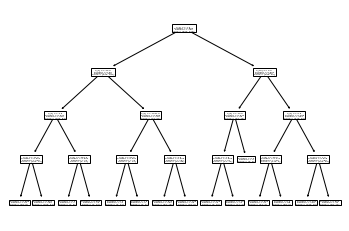

In [160]:
#plotting the decoision tree
from sklearn import tree
tree.plot_tree(model)

In [155]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

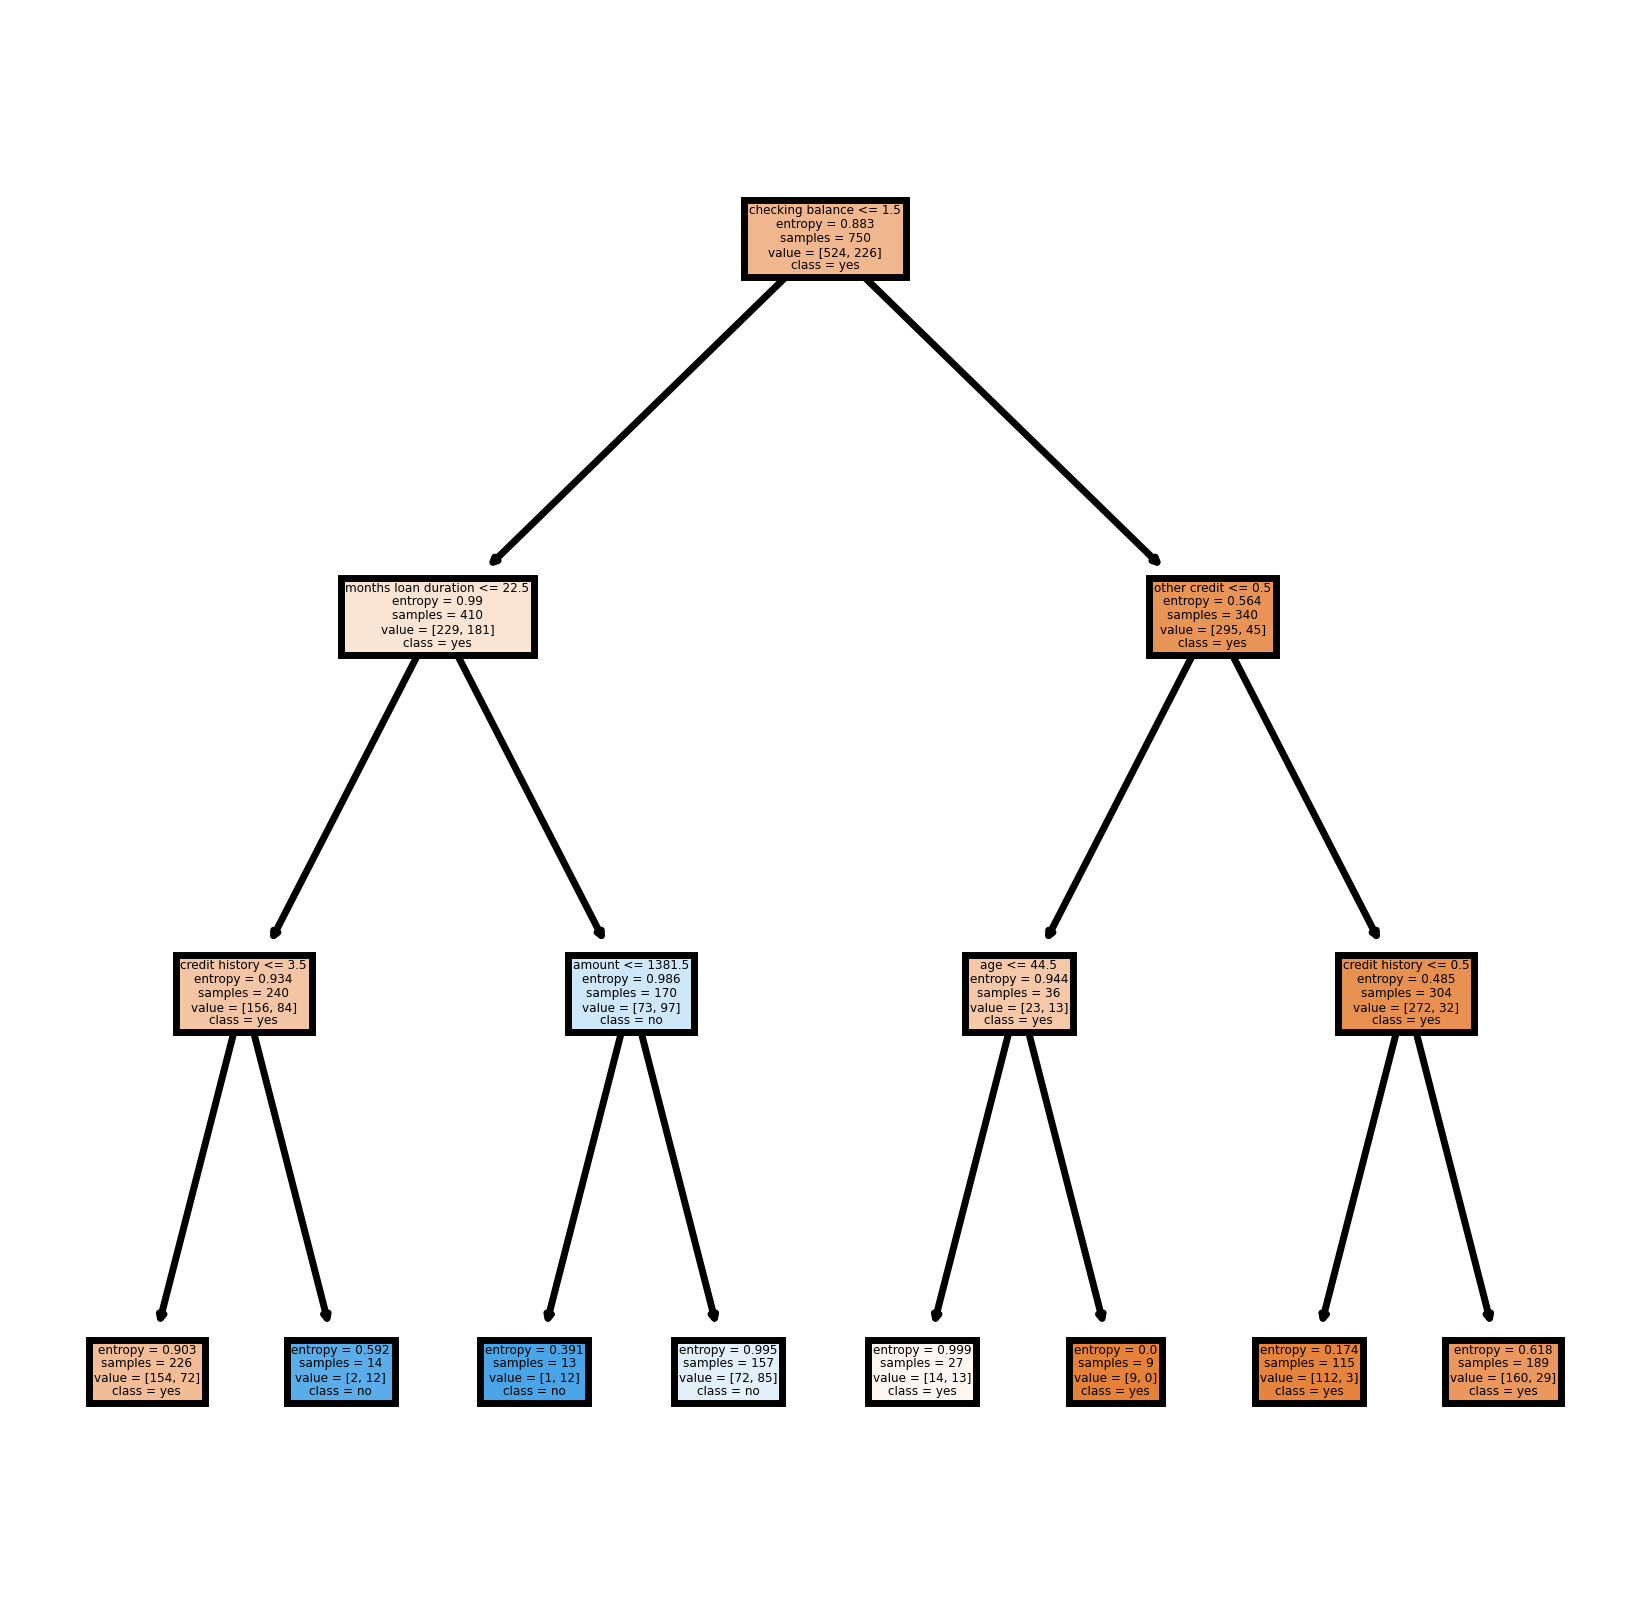

In [157]:
fn=['checking balance','months loan duration','credit history','purpose','amount','savings balance','employment duration','percent of income','years at residence','age','other credit','housing','existing loan','job','dependent','phone'] #columns
cn=['yes','no']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [161]:
#Predicting on test data
preds=model.predict(x_test) #predicting on dest data
pd.Series(preds).value_counts()   #getting the count of each category

0    185
1     65
dtype: int64

In [173]:
preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [174]:
y_test.value_counts()

0    176
1     74
Name: default, dtype: int64

In [175]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
default,,
0,150,26
1,35,39


In [176]:
preds,y_test

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]),
 993    0
 859    0
 298    0
 553    0
 672    0
       ..
 462    0
 356    0
 2      0
 478    0
 695    0
 Name: default, Length: 250, dtype: int32)

In [177]:
# Accuracy 
from sklearn.metrics import accuracy_score
np.mean(preds==y_test),accuracy_score(y_test,preds)

(0.756, 0.756)

In [178]:


# GINI INDEX 



In [170]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [171]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [172]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.756